## Комментарий наставника
Привет, Михаил! Меня зовут Александр и я буду проверять твой проект. Спасибо за твою работу:) Далее по ходу работы я оставлю свои комментарии и предложения. Постарайся их учесть в этом и дальнейших проектах. Комментарии ты можешь найти в текстовой ячейке с заголовком «Комментарий наставника» (как здесь) либо в ячейках с кодом в следующем виде: «#Комментарий наставника: <сам комментарий>». \
Часть комментариев может быть выделена цветом: \
<span style="color:green">Зелёный цвет символизирует, что всё отлично</span> \
<span style="color:orange">Оранжевый цвет символизирует рекомендации</span> \
<span style="color:red">Красный цвет символизирует недочёты</span>

### Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

In [93]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('/datasets/gym_churn.csv')

### Исследовательский анализ данных (EDA)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [96]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Посмотрим на средние значения сгруппируя датафрейм по столбцу Churn

In [97]:
clients_no_churn = df.query('Churn <= 0')
clients_churn = df.query('Churn != 0')
churn_info = pd.DataFrame({ 
                                'Среднее значение признаков клиентов в оттоке': clients_churn.mean(),
                               'Среднее значение признаков клиентов не попавших в отток': clients_no_churn.mean()
})
churn_info

,Среднее значение признаков клиентов в оттоке,Среднее значение признаков клиентов не попавших в отток
gender,0.510839,0.510037
Near_Location,0.768143,0.873086
Partner,0.355325,0.534195
Promo_friends,0.183789,0.353522
Phone,0.902922,0.903709
Contract_period,1.728558,5.747193
Group_visits,0.268615,0.464103
Age,26.989632,29.976523
Avg_additional_charges_total,115.082899,158.445715
Month_to_end_contract,1.662582,5.283089


По ключевым признакам видно, что в целом у клиентов в оттоке меньшая активность и меньшие доп.затраты.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

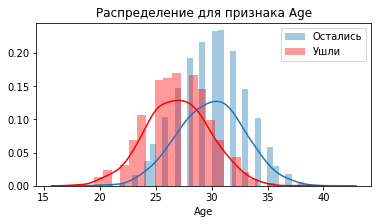

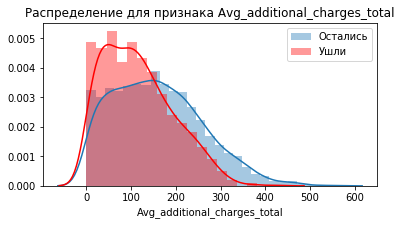

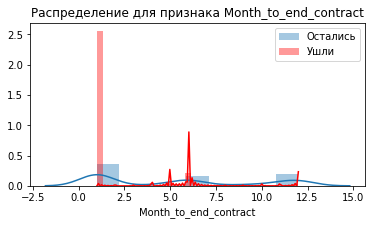

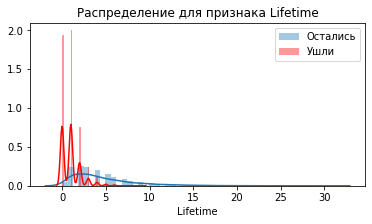

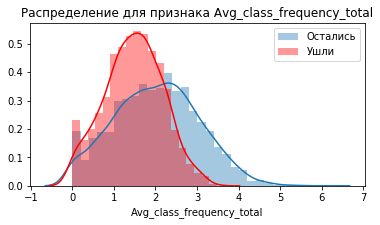

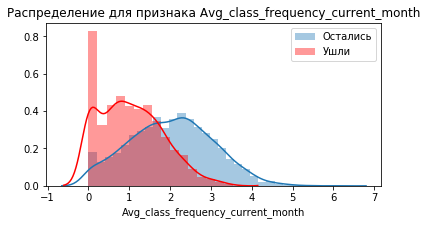

In [98]:
num_feat = df.drop(columns =(['gender', 'Near_Location', 
                              'Partner','Promo_friends', 'Phone',
                              'Group_visits', 'Contract_period', 'Churn'])).columns
for col in num_feat:
    plt.figure(figsize=(6, 3))
    sns.distplot(clients_no_churn[col])
    sns.distplot(clients_churn[col], color = 'r')
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение для признака ' + col)
    plt.show()

In [99]:
binar_feat = df[['gender', 'Near_Location', 'Partner','Promo_friends', 'Phone', 'Group_visits', 'Contract_period', 'Churn']]

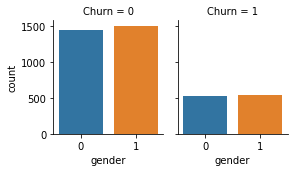

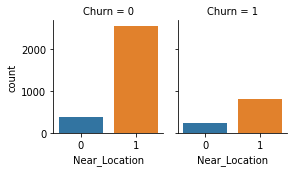

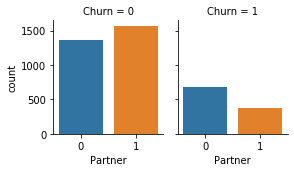

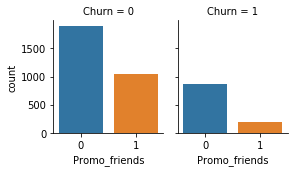

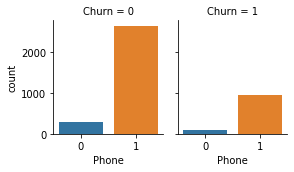

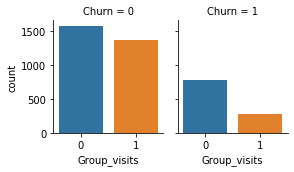

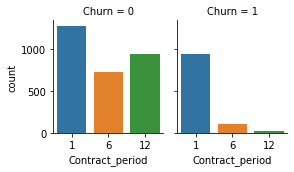

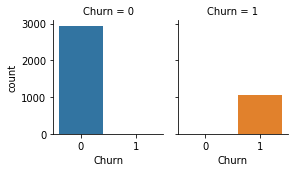

In [100]:
for col in binar_feat.columns:
    sns.catplot(col, col="Churn", data = binar_feat, kind="count", height=2.5, aspect=.8)

Видим, что чаще уходят клиенты которые:
- Покупают абонемент всего на один месяц
- Реже посещают групповые занятия

## Комментарий наставника
<span style="color:green">Хорошо! Всё верно.</span>

#### Построим матрицу корреляций

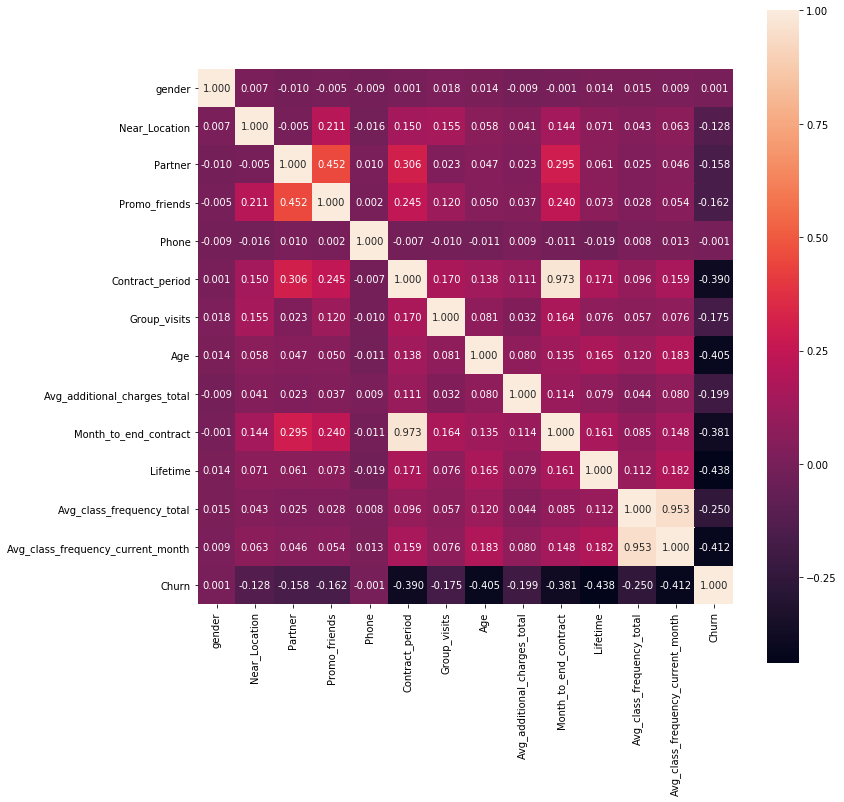

In [101]:
cm = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt = '.3f', square=True)
plt.show()

Видно, что сильно коррелируют такие признаки как Month_to_end_contract и Contract_period = 0,97, а так же Avg_class_frequency_current_month и Avg_class_frequency_total = 0,95, что логично так как признакми взаимосвязанны между собой. Выделяется так же зависимость между Promo_friends и Partner, можно предположить, что сотрудники компании партнера клуба чаще обычного приглашают своих друзей.

## Комментарий наставника
<span style="color:green">Нет вопросов. Идём далее.</span>

### Шаг 3 
### Построим модель прогнозирования оттока пользователей

In [102]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [104]:
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.92
	Recall: 0.83
	F1: 0.87
	ROC_AUC: 0.97


In [105]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.82
	F1: 0.85
	ROC_AUC: 0.97


В целом модели отличаются не критично, но модель линейной регресси показала себя лучше, чем модель случайного леса.
Так же качество обеих моделей очень высокое 0,96 и 0,97 по ROC_AUC.

## Комментарий наставника
<span style="color:green">Ещё и оценки по ROC-AUC и F1 вывел, очень хорошо! С работой с моделями всё верно.</span>

### Вопрос
Нужно ли смотреть на важность признаков? И почему при выводе .coef_ признаки идут с минусовым коэффициентом?

## Комментарий наставника
<span style="color:green">Да, оценить важность признаков лишним точно не будет. Отрицательные значения коэффициента у признака для логистической регрессии говорят о том, что у нас связь между этим признаком и целевым признаком обратно пропорциональна: чем значение рассматриваемого признака меньше, тем вероятность оттока выше в нашем случае. Положительные значения коэффициента символизируют о прямой пропорциональной связи этого признака и целевого признака.</span>

Рассмотри важность признаков по обеим моделям

In [123]:
log_reg = pd.DataFrame({'feature' : X_train.columns, 'coef' : lr_model.coef_[0]})
log_reg.sort_values(by='coef', ascending=True)

,feature,coef
12,Avg_class_frequency_current_month,-4.050762
10,Lifetime,-0.947114
6,Group_visits,-0.758866
3,Promo_friends,-0.418429
7,Age,-0.176276
5,Contract_period,-0.141623
9,Month_to_end_contract,-0.118196
1,Near_Location,-0.042185
8,Avg_additional_charges_total,-0.004603
2,Partner,0.014277


Избавимся от сильно коррелирующих друг с другом признаков, которые я обнаружил ранее с помощью карты корреляций, чтобы значения коэффициентов были более интуитивно понятны

In [122]:
lr_model_test = LogisticRegression(random_state = 0)
X_train_cleared = X_train.drop(['Avg_class_frequency_current_month', 'Month_to_end_contract'], axis=1)
lr_model_test.fit(X_train_cleared, y_train)

log_reg = pd.DataFrame({'feature' : X_train_cleared.columns, 'coef' : lr_model_test.coef_[0]})
log_reg.sort_values(by='coef', ascending=True)

,feature,coef
9,Lifetime,-0.921942
6,Group_visits,-0.723870
10,Avg_class_frequency_total,-0.587711
3,Promo_friends,-0.328494
5,Contract_period,-0.264826
7,Age,-0.205614
1,Near_Location,-0.108691
2,Partner,-0.048777
8,Avg_additional_charges_total,-0.004939
4,Phone,0.118236


In [108]:
f_m = pd.DataFrame({'feature' : X_train.columns, 'importance' : rf_model.feature_importances_})
f_m.sort_values(by='importance', ascending=False)

,feature,importance
10,Lifetime,0.266625
12,Avg_class_frequency_current_month,0.176377
11,Avg_class_frequency_total,0.134767
7,Age,0.126074
8,Avg_additional_charges_total,0.090251
9,Month_to_end_contract,0.070541
5,Contract_period,0.067267
6,Group_visits,0.018053
0,gender,0.012010
2,Partner,0.011155


Так как мы выбрали модель линейной регресии исходя из значений метрик, буду ориентироваться по ней для формулировки вывода

## Комментарий наставника
<span style="color:green">Всё верно, вопросов нет.</span>

### Шаг 4 
### Сделаем кластеризацию пользователей

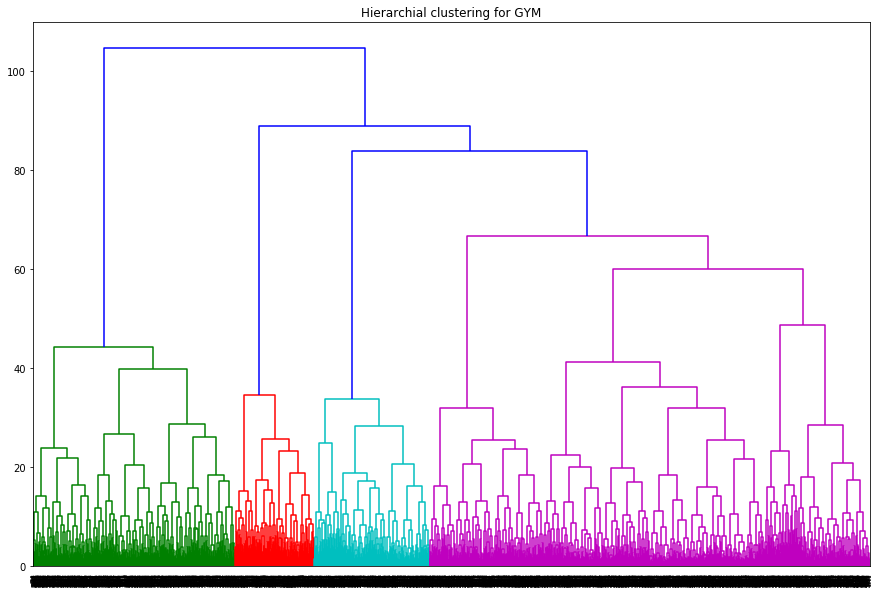

In [109]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

In [120]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
df_clust_1 = df
df_clust_1['cluster_km'] = labels

In [121]:
df_clust_final = df_clust_1.copy(deep=True)
df_clust_grouped_mean = df_clust_final.groupby('cluster_km').agg('mean')
df_clust_grouped_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Самая высокая доля оотока у 3-го кластера - 51%, у 2-го и 3-го кластеров - 44% и 27% соотвественно, минимальные значения у 4-го и 0-го кластеров - 7% и 3% (будем считать их надежными).

In [130]:
non_binary = df.drop(columns =(['gender', 'Near_Location', 
                              'Partner','Promo_friends', 'Phone',
                              'Group_visits', 'Churn', 'cluster_km','Contract_period', 'Month_to_end_contract', 'Lifetime']))
binary = df[['gender', 'Near_Location', 
                              'Partner','Promo_friends', 'Phone',
                              'Group_visits', 'Contract_period', 'Month_to_end_contract', 'Lifetime']]

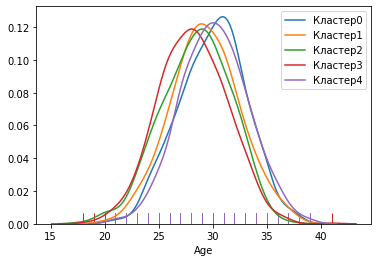

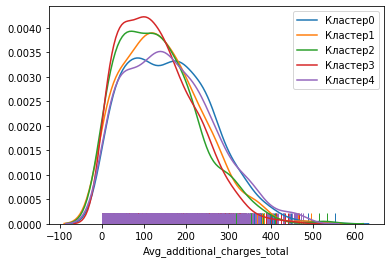

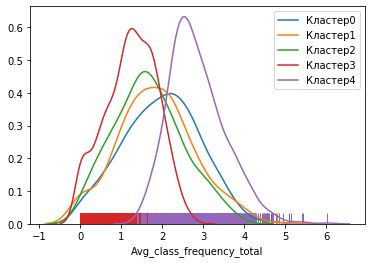

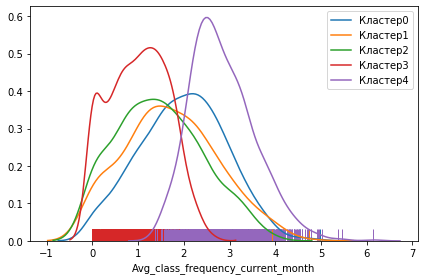

In [131]:
for col in non_binary:
    plt.figure()
    for i in range(0,5):
        sns.distplot(df_clust_1.query('cluster_km == @i')[col],
                    hist=False,
                    rug=True,
                    kde_kws={'label':'Кластер'+ str(i)})
plt.tight_layout()

- Как видно по графику Age больше всего склонны к оттоку молодые ребята, на пике 28 лет(3-й кластер), а надежные кластеры самые возрастные 0-й кластер на пике 32 года, 4-й на пике 30 лет.
- Что касается доп.затрат - более надежные кластеры имеют более широкий график, большинство клиентов 3-го тратят меньше, далее 2-й и 3-й кластер.
- Самый активный кластер 4-й, в среднем 3 посещения в неделю. Минимальная активность наблюдается у 3-го кластера, в среднем 1 занятие в неделю. Чем клиент активнее в теченеии недели посещяет зал, тем меньше вероятность его оттока
- Месячная посещяемсоть, в целом, схожа с динамикой посещений в неделю

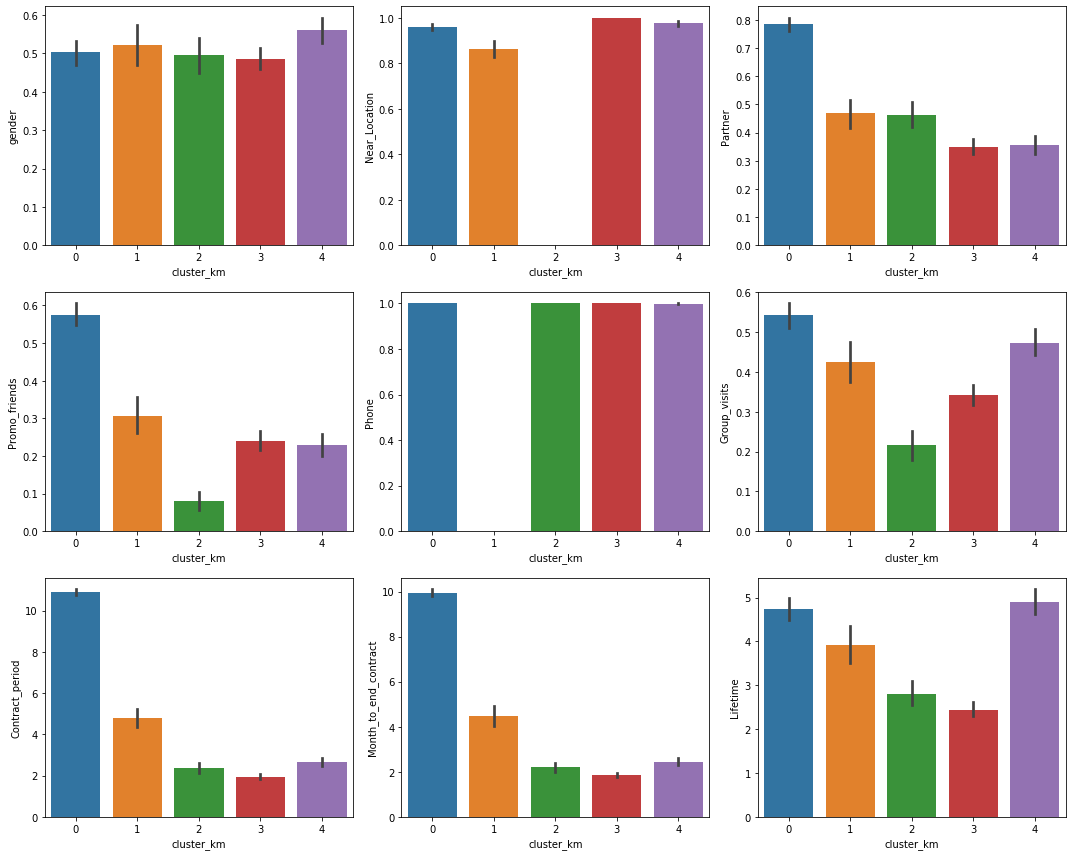

In [118]:
plt.figure(figsize=(15,12))
for i in range(len(binary.columns)):
    plt.subplot(3,3,i+1)
    x = df_clust_1['cluster_km']
    y = binary.iloc[:,i]
    sns.barplot(x=x, y=y)
plt.tight_layout()
plt.show()

- Очень наглядна динамика Lifetime(время с момента первого посещения), новые клиенты больше всего подвержены к оттоку
- Динамика Contract_period(длительность текущего абонемента) интересна, так как неясно почему у 4-го кластера такая низкая длительность абонемента, возможно клиентам удобнее покупать более короткие абонементы, стоит обратить на это внимание, возможно дело в цене, так как у 0-го кластера в основном все абонементы куплены на год, среднее 10.8 и замечается значимая динамика по признаку Partner, отмечу этот пункт в выводе
- 1-й кластер не оставил ни одоного телефонного номера
- Клиента 2-го кластера живут/работают не рядом с фитнесом
- Активнее всего посещают груповые занятия клиенты в 0-ом кластере, что логично, так как у них самый высокий показатель Partner и Promo_frinds, значит у них много знакомых, кто ходит вместе с ними на эти занятия и соотвественно "старички" клуба так же в большинстве ходят на групповые занятия

### Общий вывод
#### Первым делом стоит обратить большее внимание на новых клиентов, так как этот признак самый влиятельный на отток. А так же на то, что их траты на пике выше всех остальных кластеров, именно поэтому для новых клиентов нужно создать акции и дополнительные скидки на первое время, чтобы удержать их. Так же они чаще вего покупают абонеменет на один месяц, наверняка чтобы разведать обстановку, здесь-то и нужно их заинтересовать, возможно нужно предложить только для новых клиентов абономент на 3 месяца + возможность посетить платные занятие бесплатно, так они смогу познакомиться с уже постоянными клиентами, а это очень важно. Так же нужно уделить внимание акции Приведи друга и для новых клиентов, кто купил абонемент, например не на 1 месяц, а на 12, он получит дополнительный абонемент для друга бесплатно. В остальном же постоянные клиенты имеют гиппер минимальную склонность к оттоку, но так же имеют тенденцию покупать абонемент на один месяц, стоить создать программу лояльности, таким образом уменьшится вероятность оттока постоянных клиентов!

## Итоговый комментарий наставника
<span style="color:red">Отлично! Вывод и рекомендации хорошие. Обрати, пожалуйста, внимание на мои комментарии и особенно на комментарий к кластеризации. Как доделаешь работу, сразу присылай нам её обратно. Будем ждать:)</span> \
<span style="color:green">UPD 11.05.2020 Молодец! Теперь всё круто. Зачтено без вопросов. Желаю тебе успехов:)</span>